In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_up_BTC1.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,NaN,up,2017-07-20 14:00:00,CryptoHourly,0,0,NaN,"@#1, Bitcoin with unit price of $2,575.23, mar..."
1,NaN,up,2017-07-20 14:00:01,Ran_Networks,0,0,NaN,La gran debilidad que podría matar al bitcoin ...
2,NaN,up,2017-07-20 14:00:02,bitcoinrate247,0,0,NaN,"Average Bitcoin market price is: USD 2,594.98,..."
3,NaN,up,2017-07-20 14:00:02,coinstats,0,0,#Bitcoin #Bitcoin #BTC #BTC,"Bitcoin - BTC Price: $2,575.23 Change in 1h: +..."
4,NaN,up,2017-07-20 14:00:02,fed_fab,0,0,#FreiExchange #FRC #BTC #BTC #freiexchange #Fr...,#FreiExchange #FRC / #BTC : 0.00000056 | Volum...
...,...,...,...,...,...,...,...,...
7454,NaN,up,2017-07-20 19:59:25,CryptoWizards,0,1,NaN,"""They"" were busy buying last week...they're pr..."
7455,NaN,up,2017-07-20 19:59:25,JohnPetruse,0,0,#happy,Bitcoin climbing back up again. #happy
7456,NaN,up,2017-07-20 19:59:33,NeoNetWalker,0,0,#Blockchain,"Price Analysis: Bitcoin, Ethereum, Litecoin: h..."
7457,NaN,up,2017-07-20 19:59:34,BlackBullTradn,0,0,NaN,"Price Analysis: Bitcoin, Ethereum, Litecoin ht..."


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0       [@, 1, ,, bitcoin, with, unit, price, of, $, 2...
1       [la, gran, debilidad, que, podría, matar, al, ...
2       [average, bitcoin, market, price, is, :, usd, ...
3       [bitcoin, btc, price, :, $, 2,575.23, change, ...
4       [freiexchange, frc, btc, :, 0.00000056, |, vol...
                              ...                        
7454    [``, they, '', were, busy, buying, last, week,...
7455       [bitcoin, climbing, back, up, again, ., happy]
7456    [price, analysis, :, bitcoin, ,, ethereum, ,, ...
7457    [price, analysis, :, bitcoin, ,, ethereum, ,, ...
7458    [bitcoin, chain, split, &, amp, ;, hard, fork,...
Name: text, Length: 7459, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0       [,, bitcoin, unit, price, $, ,, market, cap, $...
1       [la, gran, debilidad, que, podría, matar, bitc...
2       [average, bitcoin, market, price, :, usd, ,, eur]
3       [bitcoin, btc, price, :, $, change, :, %, mark...
4       [freiexchange, frc, btc, :, |, volume, :, frc,...
                              ...                        
7454    [``, '', busy, buying, last, week, ..., 're, p...
7455                        [bitcoin, climbing, ., happy]
7456    [price, analysis, :, bitcoin, ,, ethereum, ,, ...
7457    [price, analysis, :, bitcoin, ,, ethereum, ,, ...
7458    [bitcoin, chain, split, amp, ;, hard, fork, ,,...
Name: text, Length: 7459, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

8100

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

8100


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

8100

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

8100

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

258.6576927630083

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.022191267652548752

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

6.125953578101557

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
605,"[-0.31557437777519226, -0.42444244027137756, -...",take,0,"[-0.035585865, -0.062275026, -0.10073645, -0.0...",0.003220,0.021456,0.981765,NaN
31,"[-0.292927622795105, -0.6380903720855713, -0.7...",steal,0,"[-0.035585865, -0.062275026, -0.10073645, -0.0...",0.004428,0.022075,0.982354,NaN
607,"[-0.30496856570243835, -0.7103419303894043, -0...",confess,0,"[-0.035585865, -0.062275026, -0.10073645, -0.0...",0.007388,0.017330,0.990058,NaN
30,"[-0.30817291140556335, -0.6323326826095581, -0...",hacker,0,"[-0.035585865, -0.062275026, -0.10073645, -0.0...",0.008569,0.017123,0.991446,NaN
606,"[-0.2707033157348633, -0.5416215658187866, -0....",necklace,0,"[-0.035585865, -0.062275026, -0.10073645, -0.0...",0.002966,0.011347,0.991619,NaN
162,"[-0.19007372856140137, -0.452465295791626, -0....",heist,0,"[-0.035585865, -0.062275026, -0.10073645, -0.0...",0.005376,0.010934,0.994442,NaN
1156,"[-0.13571161031723022, -0.27016133069992065, -...",theft,0,"[-0.035585865, -0.062275026, -0.10073645, -0.0...",0.003068,0.006808,0.996259,NaN
710,"[-0.1257590800523758, -0.10275758802890778, -0...",cash,0,"[-0.035585865, -0.062275026, -0.10073645, -0.0...",0.012456,0.008252,1.004204,NaN
4358,"[-0.12374197691679001, -0.2852029800415039, -0...",pennsylvania,0,"[-0.035585865, -0.062275026, -0.10073645, -0.0...",0.011943,0.006395,1.005547,NaN
2780,"[-0.04930827394127846, -0.05761614441871643, -...",official,0,"[-0.035585865, -0.062275026, -0.10073645, -0.0...",0.010043,0.002785,1.007258,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 거래소 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[0.07004295289516449, 0.45214930176734924, -1....",bitcoin,1,"[0.03139259, 0.055389214, -0.08750064, -0.0204...",0.022191,0.965920,0.056272,NaN
2,"[0.22888675332069397, 0.6227161288261414, -0.6...",price,1,"[0.03139259, 0.055389214, -0.08750064, -0.0204...",0.070086,0.099336,0.970751,NaN
14,"[0.45785191655158997, 0.662988007068634, -0.97...",trade,1,"[0.03139259, 0.055389214, -0.08750064, -0.0204...",0.040074,0.037754,1.002320,NaN
694,"[0.1184113398194313, 0.16374140977859497, -0.4...",cointelegraph,1,"[0.03139259, 0.055389214, -0.08750064, -0.0204...",0.024957,0.015576,1.009381,NaN
322,"[0.017947431653738022, 0.058078184723854065, -...",bitinka,1,"[0.03139259, 0.055389214, -0.08750064, -0.0204...",0.023489,0.001032,1.022457,NaN
1305,"[0.03855200111865997, 0.11590781807899475, -0....",disappear,1,"[0.03139259, 0.055389214, -0.08750064, -0.0204...",0.026234,0.002373,1.023861,NaN
2782,"[0.020922977477312088, 0.06278613209724426, -0...",rocket,1,"[0.03139259, 0.055389214, -0.08750064, -0.0204...",0.026304,0.001754,1.024550,NaN
6241,"[0.00642334995791316, 0.01866733469069004, -0....",temporary,1,"[0.03139259, 0.055389214, -0.08750064, -0.0204...",0.026114,0.000309,1.025805,NaN
640,"[0.0402044914662838, 0.09523305296897888, -0.1...",bitcoinrts,1,"[0.03139259, 0.055389214, -0.08750064, -0.0204...",0.028614,0.002785,1.025829,NaN
428,"[0.009048120118677616, 0.10378072410821915, -0...",speculator,1,"[0.03139259, 0.055389214, -0.08750064, -0.0204...",0.029848,0.003713,1.026134,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
57,"[-0.09945891052484512, 0.33982083201408386, -1...",blockchain,2,"[-0.010852945, 0.025517598, -0.064784266, -0.0...",0.007404,0.086442,0.920962,NaN
62,"[-0.06900506466627121, 0.4268825054168701, -0....",news,2,"[-0.010852945, 0.025517598, -0.064784266, -0.0...",0.043283,0.092425,0.950858,NaN
29,"[-0.02786380983889103, 0.35104629397392273, -0...",cryptocurrency,2,"[-0.010852945, 0.025517598, -0.064784266, -0.0...",0.010960,0.052917,0.958042,NaN
33,"[-0.021564986556768417, 0.2671065926551819, -0...",ethereum,2,"[-0.010852945, 0.025517598, -0.064784266, -0.0...",0.013054,0.053846,0.959208,NaN
25,"[-0.1011732667684555, 0.31476113200187683, -0....",free,2,"[-0.010852945, 0.025517598, -0.064784266, -0.0...",0.002077,0.029398,0.972679,NaN
123,"[0.013146011158823967, 0.3298296630382538, -0....",crypto,2,"[-0.010852945, 0.025517598, -0.064784266, -0.0...",0.021569,0.041674,0.979896,NaN
3,"[-0.09797872602939606, 0.34667524695396423, -0...",market,2,"[-0.010852945, 0.025517598, -0.064784266, -0.0...",0.008804,0.024860,0.983945,NaN
619,"[-0.11454804986715317, 0.36469727754592896, -0...",make,2,"[-0.010852945, 0.025517598, -0.064784266, -0.0...",0.000932,0.015576,0.985356,NaN
50,"[-0.089909128844738, 0.42500030994415283, -0.9...",scale,2,"[-0.010852945, 0.025517598, -0.064784266, -0.0...",0.003707,0.017433,0.986274,NaN
93,"[-0.026752661913633347, 0.2182990461587906, -0...",fintech,2,"[-0.010852945, 0.025517598, -0.064784266, -0.0...",0.017237,0.030946,0.986291,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1754,"[0.008796035312116146, -0.003906013211235404, ...",yellow,3,"[0.00071339577, 0.00015068239, 0.003801772, -0...",0.180969,0.000103,1.180866,NaN
7396,"[0.0029588360339403152, -0.0026621902361512184...",bitcrystals,3,"[0.00071339577, 0.00015068239, 0.003801772, -0...",0.206864,0.000103,1.206761,NaN
2329,"[0.021908050402998924, 0.007978583686053753, 0...",dominate,3,"[0.00071339577, 0.00015068239, 0.003801772, -0...",0.215177,0.000413,1.214765,NaN
7476,"[-0.003349939826875925, -0.005124786868691444,...",thebitc,3,"[0.00071339577, 0.00015068239, 0.003801772, -0...",0.242351,0.000103,1.242248,NaN
7766,"[0.004894173704087734, -0.006729390937834978, ...",volatil,3,"[0.00071339577, 0.00015068239, 0.003801772, -0...",0.260335,0.000103,1.260232,NaN
4391,"[0.007312958128750324, 0.0012684925459325314, ...",indxio,3,"[0.00071339577, 0.00015068239, 0.003801772, -0...",0.279368,0.000206,1.279162,NaN
700,"[0.006171225570142269, -0.001721520209684968, ...",v=gtgpppyflfe,3,"[0.00071339577, 0.00015068239, 0.003801772, -0...",0.289180,0.000206,1.288974,NaN
4977,"[-0.003586954204365611, -0.006314617581665516,...",breakingbitcoinnews,3,"[0.00071339577, 0.00015068239, 0.003801772, -0...",0.304484,0.000103,1.304380,NaN
10,"[0.0005836395430378616, 0.004123434890061617, ...",rank,3,"[0.00071339577, 0.00015068239, 0.003801772, -0...",0.309608,0.000619,1.308989,NaN
504,"[-0.002295054029673338, -0.004818097222596407,...",duration,3,"[0.00071339577, 0.00015068239, 0.003801772, -0...",0.314223,0.000103,1.314120,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

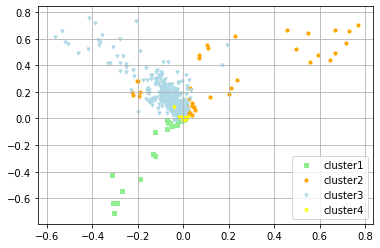

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 이슈

72

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 거래소,돈

249

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 투자

7688

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

91

In [62]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [63]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 5 # 이슈

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 12 # 거래소,돈

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 11 # 투자

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [68]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [69]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [70]:
kmeans.inertia_

876.6669311523438

In [71]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 0 2 ... 0 0 0]


In [72]:
cluster_values= list(model.wv.vocab)

In [73]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-876.6669311523438


In [74]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [75]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.71152955


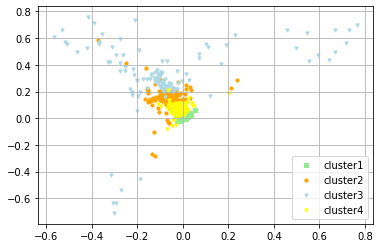

In [76]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [77]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [78]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [79]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [80]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [81]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [82]:
import scipy.spatial.distance as dist

In [83]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [84]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6707,"[-0.008978325873613358, 0.00898995716124773, -...",deeplearning,0,"[-0.0046079154, 0.011154213, -0.028969191, -0....",0.024980,0.000103,1.024877,NaN
2404,"[-0.004203914664685726, 0.010414674878120422, ...",prescottregency,0,"[-0.0046079154, 0.011154213, -0.028969191, -0....",0.025745,0.000103,1.025642,NaN
920,"[-0.007102112285792828, 0.015601536259055138, ...",indien,0,"[-0.0046079154, 0.011154213, -0.028969191, -0....",0.026377,0.000103,1.026273,NaN
4578,"[-0.008912701159715652, 0.011209702119231224, ...",conor,0,"[-0.0046079154, 0.011154213, -0.028969191, -0....",0.026464,0.000103,1.026361,NaN
1815,"[-0.0032803667709231377, 0.007075023837387562,...",lieben,0,"[-0.0046079154, 0.011154213, -0.028969191, -0....",0.026833,0.000103,1.026729,NaN
853,"[-0.002732660388574004, 0.01052399817854166, -...",kabarmedancom,0,"[-0.0046079154, 0.011154213, -0.028969191, -0....",0.027027,0.000103,1.026924,NaN
3288,"[-0.003975430503487587, 0.015370246954262257, ...",¡como,0,"[-0.0046079154, 0.011154213, -0.028969191, -0....",0.027179,0.000206,1.026973,NaN
6384,"[-0.00910583883523941, 0.008797433227300644, -...",mensch,0,"[-0.0046079154, 0.011154213, -0.028969191, -0....",0.027258,0.000103,1.027155,NaN
3726,"[-0.006802320014685392, 0.008866600692272186, ...",cheat,0,"[-0.0046079154, 0.011154213, -0.028969191, -0....",0.027327,0.000103,1.027223,NaN
5200,"[-0.000632824026979506, 0.01109505444765091, -...",plenty,0,"[-0.0046079154, 0.011154213, -0.028969191, -0....",0.027611,0.000206,1.027405,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(50,'score') # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
677,"[-0.06134090572595596, 0.1437234729528427, -0....",scheme,1,"[-0.06128364, 0.140466, -0.37300053, -0.115995...",0.061066,0.002373,1.058693,NaN
426,"[-0.053867414593696594, 0.1415921449661255, -0...",voor,1,"[-0.06128364, 0.140466, -0.37300053, -0.115995...",0.061826,0.001547,1.060279,NaN
789,"[-0.056710660457611084, 0.13807852566242218, -...",steemit,1,"[-0.06128364, 0.140466, -0.37300053, -0.115995...",0.076232,0.003301,1.072932,NaN
329,"[-0.05483785271644592, 0.1472814381122589, -0....",happen,1,"[-0.06128364, 0.140466, -0.37300053, -0.115995...",0.082446,0.005054,1.077391,NaN
461,"[-0.056341324001550674, 0.14207202196121216, -...",love,1,"[-0.06128364, 0.140466, -0.37300053, -0.115995...",0.081461,0.003610,1.077851,NaN
215,"[-0.06122232601046562, 0.13728825747966766, -0...",find,1,"[-0.06128364, 0.140466, -0.37300053, -0.115995...",0.083325,0.002991,1.080334,NaN
197,"[-0.05698199197649956, 0.133082315325737, -0.3...",dinero,1,"[-0.06128364, 0.140466, -0.37300053, -0.115995...",0.090575,0.001547,1.089028,NaN
927,"[-0.07883374392986298, 0.12550391256809235, -0...",reach,1,"[-0.06128364, 0.140466, -0.37300053, -0.115995...",0.102261,0.005673,1.096587,NaN
297,"[-0.053794015198946, 0.1472609043121338, -0.38...",platform,1,"[-0.06128364, 0.140466, -0.37300053, -0.115995...",0.106134,0.004332,1.101802,NaN
657,"[-0.06533225625753403, 0.13162216544151306, -0...",criptomonedas,1,"[-0.06128364, 0.140466, -0.37300053, -0.115995...",0.106922,0.003301,1.103621,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 사회,비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
157,"[-0.11640951037406921, 0.3009756803512573, -0....",time,2,"[-0.078174666, 0.31874308, -0.7525338, -0.2358...",0.244084,0.009593,1.234491,NaN
349,"[-0.09141136705875397, 0.2744395434856415, -0....",money,2,"[-0.078174666, 0.31874308, -0.7525338, -0.2358...",0.254679,0.011863,1.242817,NaN
354,"[-0.10359469801187515, 0.30455151200294495, -0...",join,2,"[-0.078174666, 0.31874308, -0.7525338, -0.2358...",0.276257,0.009490,1.266767,NaN
283,"[-0.07956597208976746, 0.2951614558696747, -0....",miner,2,"[-0.078174666, 0.31874308, -0.7525338, -0.2358...",0.298326,0.012069,1.286257,NaN
318,"[-0.12148155272006989, 0.27711883187294006, -0...",precio,2,"[-0.078174666, 0.31874308, -0.7525338, -0.2358...",0.306488,0.009387,1.297101,NaN
77,"[-0.10822665691375732, 0.3286868631839752, -0....",gold,2,"[-0.078174666, 0.31874308, -0.7525338, -0.2358...",0.350987,0.011450,1.339537,NaN
529,"[-0.10638771951198578, 0.2692188620567322, -0....",check,2,"[-0.078174666, 0.31874308, -0.7525338, -0.2358...",0.382132,0.013410,1.368723,NaN
252,"[-0.09900877624750137, 0.32831305265426636, -0...",bitcoins,2,"[-0.078174666, 0.31874308, -0.7525338, -0.2358...",0.410759,0.011656,1.399102,NaN
278,"[-0.09045367687940598, 0.2664211392402649, -0....",block,2,"[-0.078174666, 0.31874308, -0.7525338, -0.2358...",0.419668,0.010315,1.409353,NaN
558,"[-0.14217443764209747, 0.32550016045570374, -0...",network,2,"[-0.078174666, 0.31874308, -0.7525338, -0.2358...",0.424644,0.010831,1.413813,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 긍정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
800,"[-0.023245761170983315, 0.05638940632343292, -...",robo,3,"[-0.021576092, 0.055468213, -0.14380561, -0.04...",0.032420,0.000516,1.031905,NaN
2123,"[-0.01578429341316223, 0.055836908519268036, -...",эфириум,3,"[-0.021576092, 0.055468213, -0.14380561, -0.04...",0.033037,0.000309,1.032728,NaN
1496,"[-0.02016177773475647, 0.055368147790431976, -...",hike,3,"[-0.021576092, 0.055468213, -0.14380561, -0.04...",0.038241,0.000722,1.037519,NaN
614,"[-0.023168381303548813, 0.0507931113243103, -0...",issue,3,"[-0.021576092, 0.055468213, -0.14380561, -0.04...",0.039144,0.000928,1.038215,NaN
5447,"[-0.019042229279875755, 0.056649234145879745, ...",expand,3,"[-0.021576092, 0.055468213, -0.14380561, -0.04...",0.038943,0.000516,1.038427,NaN
1529,"[-0.02194328047335148, 0.05529096722602844, -0...",revolution,3,"[-0.021576092, 0.055468213, -0.14380561, -0.04...",0.039958,0.001135,1.038823,NaN
2199,"[-0.01899561658501625, 0.05066291242837906, -0...",upgrade,3,"[-0.021576092, 0.055468213, -0.14380561, -0.04...",0.039459,0.000619,1.038840,NaN
3555,"[-0.023642726242542267, 0.059429872781038284, ...",cotización,3,"[-0.021576092, 0.055468213, -0.14380561, -0.04...",0.040591,0.001444,1.039146,NaN
3324,"[-0.02382051758468151, 0.05934619531035423, -0...",toda,3,"[-0.021576092, 0.055468213, -0.14380561, -0.04...",0.040372,0.000619,1.039754,NaN
6054,"[-0.023659605532884598, 0.05513257905840874, -...",wolf,3,"[-0.021576092, 0.055468213, -0.14380561, -0.04...",0.040178,0.000413,1.039765,NaN


In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #긍정

6736

In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #기술

274

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #비즈

119

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #긍정

971

In [93]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [94]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 1 # 긍정

In [95]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 9 # 기술

In [96]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 7 # 비즈

In [97]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 1 # 긍정

In [98]:
temp_cluster_result1['Silhouette'] = 0.71152955
temp_cluster_result['Silhouette'] = 0.71152955
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [99]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_up_BTC1_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_up_BTC1_cosine")